In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from scikeras.wrappers import KerasClassifier
from tensorflow.keras.optimizers import Adam

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# Бінарна класифікація

In [ ]:
df_xor=pd.read_csv('/content/drive/MyDrive/ШНМ/xor.csv')
print(df_xor.head())

   Unnamed: 0        X1        X2  label
0           0  0.295740  0.084965    0.0
1           1  0.071516  0.281896    0.0
2           2  0.167992  0.242829    0.0
3           3  0.007919  0.481756    0.0
4           4  0.100156  0.447592    0.0


In [ ]:
df_xor.shape

(1000, 4)

In [ ]:
df_xor= df_xor.drop('Unnamed: 0', axis=1)
df_xor.columns

Index(['X1', 'X2', 'label'], dtype='object')

In [ ]:
df_xor.describe()

,X1,X2,label
count,1000.000000,1000.000000,1000.00000
mean,0.509165,0.497304,0.50000
std,0.289903,0.292510,0.50025
min,0.002790,0.000765,0.00000
25%,0.254967,0.233758,0.00000
50%,0.499966,0.499864,0.50000
75%,0.759471,0.737979,1.00000
max,0.999760,0.997562,1.00000


In [ ]:
df_xor.isna().sum()

,0
X1,0
X2,0
label,0


In [ ]:
df_xor.duplicated().sum()

0

In [ ]:
df_xor.dtypes

,0
X1,float64
X2,float64
label,float64


In [ ]:
df_xor['label']=df_xor['label'].astype('int')
df_xor.head()

,X1,X2,label
0,0.295740,0.084965,0
1,0.071516,0.281896,0
2,0.167992,0.242829,0
3,0.007919,0.481756,0
4,0.100156,0.447592,0


**EDA**

<Axes: xlabel='X1', ylabel='X2'>

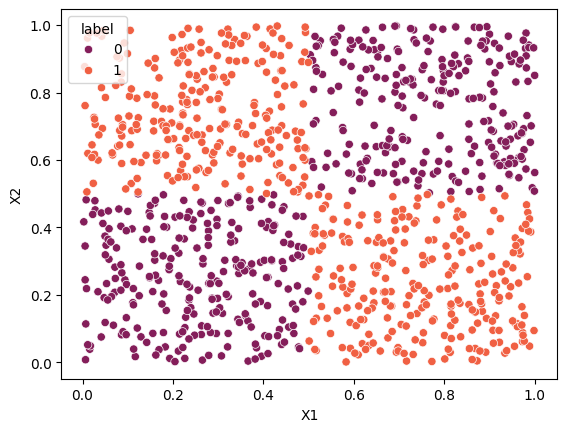

In [ ]:
sns.scatterplot(data=df_xor, x='X1', y='X2', hue='label', palette='rocket')

**Preparing data and building the model**

In [ ]:
X= df_xor.drop('label', axis=1)
y=df_xor['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=121)

In [ ]:
model= Sequential()

model.add(Dense(32, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 32)                  │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129 (516.00 B)

 Trainable params: 129 (516.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
monitor= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history= model.fit(X_train, y_train, epochs=100, validation_split=0.16, callbacks=[monitor])

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5741 - loss: 0.6747 - val_accuracy: 0.7344 - val_loss: 0.5745
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8643 - loss: 0.4397 - val_accuracy: 0.8359 - val_loss: 0.3580
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8790 - loss: 0.2881 - val_accuracy: 0.8828 - val_loss: 0.2875
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8788 - loss: 0.2586 - val_accuracy: 0.8672 - val_loss: 0.2844
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9131 - loss: 0.2104 - val_accuracy: 0.9609 - val_loss: 0.1903
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9534 - loss: 0.1423 - val_accuracy: 0.9453 - val_loss: 0.1726
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9736 - loss: 0.1121 - val_accuracy: 0.9297 - val_loss: 0.1705
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9690 - loss: 0.1022 - val_accuracy: 0.9297

In [ ]:
def plot_epochs_accuracy(history):
  fig, axs = plt.subplots(nrows=2, sharex=True)
  sns.lineplot(history.history['loss'], ax=axs[0], label='loss')
  sns.lineplot(history.history['val_loss'], ax=axs[0], label='val_loss')
  axs[0].legend()
  sns.lineplot(history.history['accuracy'], ax=axs[1], label='accuracy')
  sns.lineplot(history.history['val_accuracy'], ax=axs[1], label='val_accuracy')

  axs[1].legend()
  plt.show()

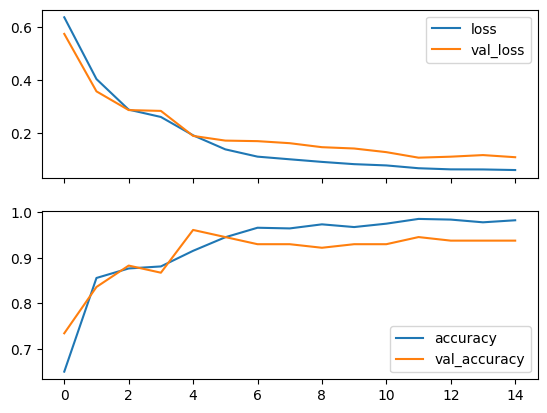

In [ ]:
plot_epochs_accuracy(history)

In [ ]:
accuracy= model.evaluate(X_test, y_test)[1]
print('Accuracy:', accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9685 - loss: 0.0746  
Accuracy: 0.9649999737739563


In [ ]:
y_pred= model.predict(X_test)


1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       100
           1       0.93      1.00      0.97       100

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.96       200



<Axes: >

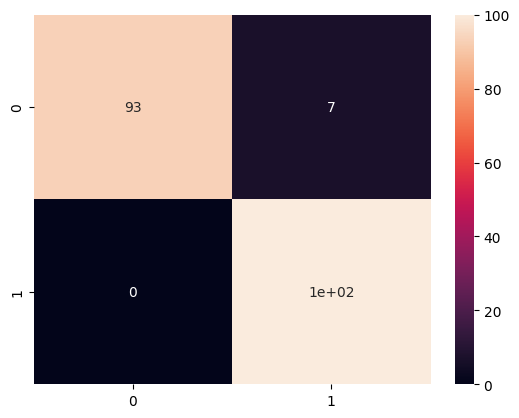

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

**Grid search for best parameters**

In [ ]:
def create_model(activation='relu', layers=1):
    model = Sequential()
    model.add(Dense(32, input_dim=2, activation=activation))

    for _ in range(layers):
        model.add(Dense(32, activation=activation))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
    return model

model_iris = KerasClassifier(model=create_model, optimizer=Adam(learning_rate=0.1), epochs=10, batch_size=32)

activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
param_grid_xor = {
    'model__activation': activation,
    'model__layers': np.arange(1, 5, 1)
}

grid_xor = GridSearchCV(estimator=model_iris, param_grid=param_grid_xor, scoring='accuracy', n_jobs=-1, cv=3)

grid_result_xor = grid_xor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4879 - loss: 0.8705
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7797 - loss: 0.4773  
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9201 - loss: 0.1969 
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8601 - loss: 0.3236 
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8836 - loss: 0.2811 
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8935 - loss: 0.2966 
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8841 - loss: 0.3111 
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8699 - loss: 0.2951  
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8839 - loss: 0.2499 
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9043 - loss: 0.2051 


In [ ]:
grid_result_xor.best_params_

{'model__activation': 'tanh', 'model__layers': 1}

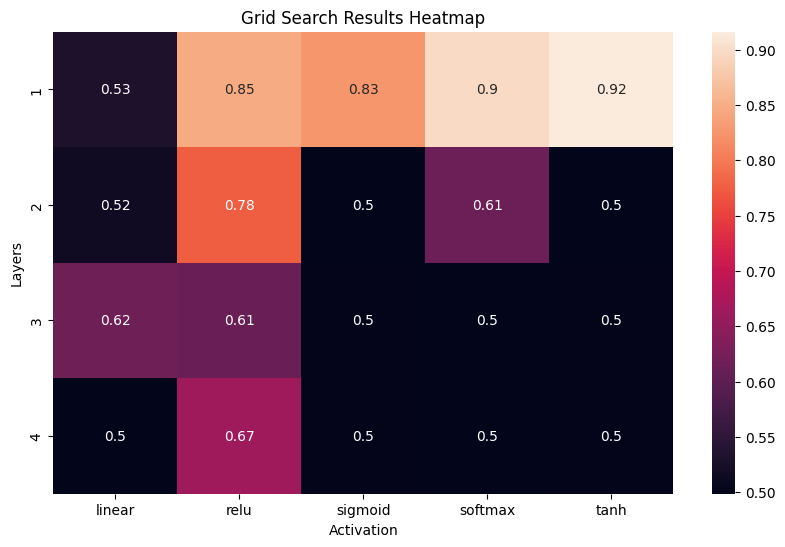

In [ ]:
results_xor = grid_result_xor.cv_results_

data = pd.DataFrame({
    'layers': results_xor['param_model__layers'],
    'activation': results_xor['param_model__activation'],
    'mean_score': results_xor['mean_test_score']
})

heatmap_data = data.pivot(index='layers', columns='activation', values='mean_score')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True)
plt.xlabel('Activation')
plt.ylabel('Layers')
plt.title('Grid Search Results Heatmap')
plt.show()

In [ ]:
best_keras_classifier_xor = grid_result_xor.best_estimator_
test_accuracy = best_keras_classifier_xor.score(X_test, y_test)
print(test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
0.845


In [ ]:
y_pred_best_xor= best_keras_classifier_xor.predict(X_test)
threshold = 0.5
y_pred_best_xor = (y_pred_best_xor > threshold).astype(int)

print(classification_report(y_test, y_pred_best_xor))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       100
           1       0.79      0.94      0.86       100

    accuracy                           0.84       200
   macro avg       0.86      0.84      0.84       200
weighted avg       0.86      0.84      0.84       200



<Axes: >

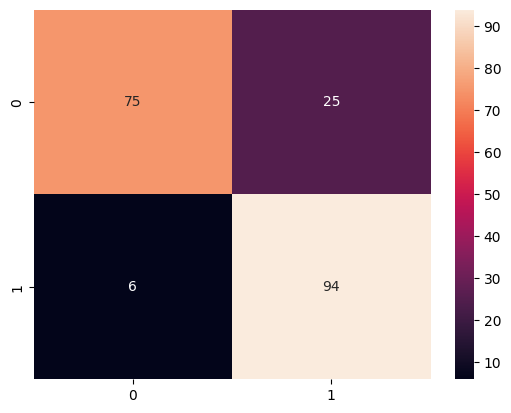

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_best_xor), annot=True)

#  Багатокласова  класифікація з MLP

**Preprocessing, Data cleaning**


In [ ]:
df_iris=pd.read_csv('/content/drive/MyDrive/ШНМ/Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_iris= df_iris.drop('Id', axis=1)
df_iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df_iris.isna().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [ ]:
df_iris.duplicated().sum()

3

In [ ]:
df_iris.drop_duplicates(inplace=True)
df_iris.duplicated().sum()

0

**EDA**

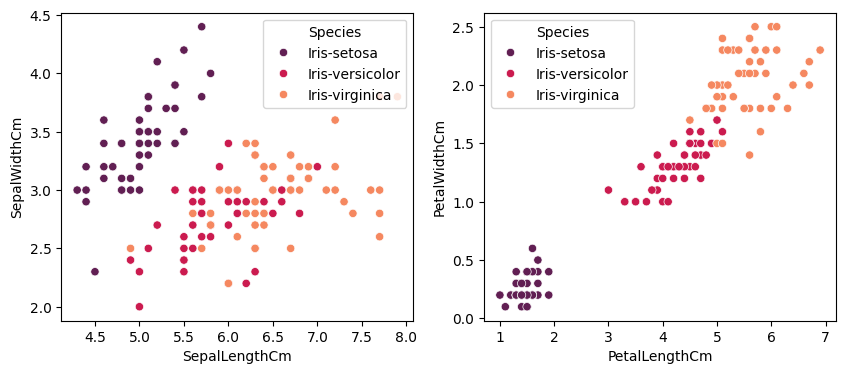

In [ ]:
fig, ax= plt.subplots(ncols=2, figsize=(10, 4))

sns.scatterplot(data=df_iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species', ax=ax[0], palette='rocket')
sns.scatterplot(data=df_iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species', ax=ax[1], palette='rocket')
plt.show()

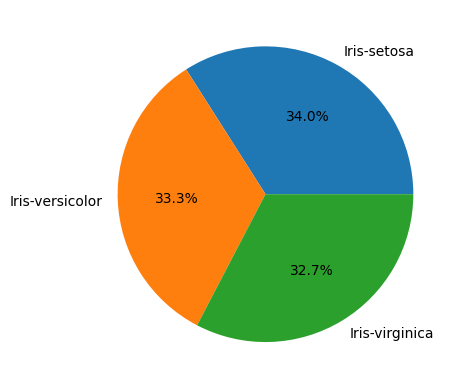

In [ ]:
plt.pie(df_iris['Species'].value_counts(), labels=df_iris['Species'].unique(), autopct='%1.1f%%')
plt.show()

**Preprocessing**

In [ ]:
X_iris= df_iris.drop('Species', axis=1)
y_iris= df_iris['Species']
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, shuffle=True, stratify=y_iris, random_state=121)

In [ ]:
y_train_iris.unique()

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [ ]:
species={
    'Iris-versicolor': 0,
    'Iris-setosa':1,
    'Iris-virginica':2
}

y_train_iris= y_train_iris.map(species)
y_test_iris= y_test_iris.map(species)

y_train_iris_enc = to_categorical(y_train_iris, num_classes=3)
y_test_iris_enc = to_categorical(y_test_iris, num_classes=3)

In [ ]:
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_iris)
X_test_scaled= scaler.transform(X_test_iris)

**Building the model**

In [ ]:
model_iris= Sequential()
model_iris.add(Dense(32, input_dim=4, activation='relu'))
model_iris.add(Dense(3, activation='softmax'))

model_iris.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_iris.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 32)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
monitor_iris= EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history_iris= model_iris.fit(X_train_scaled, y_train_iris_enc, epochs=100, validation_split=0.16, callbacks=[monitor_iris])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3347 - loss: 0.9700 - val_accuracy: 0.8421 - val_loss: 0.2789
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8140 - loss: 0.4260 - val_accuracy: 0.8947 - val_loss: 0.2594
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8449 - loss: 0.3160 - val_accuracy: 0.9474 - val_loss: 0.1936
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9318 - loss: 0.1748 - val_accuracy: 1.0000 - val_loss: 0.0962
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9318 - loss: 0.1199 - val_accuracy: 0.8947 - val_loss: 0.1159
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9721 - loss: 0.0827 - val_accuracy: 0.9474 - val_loss: 0.1460
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9660 - loss: 0.0664 - val_accuracy: 0.9474 - val_loss: 0.1158


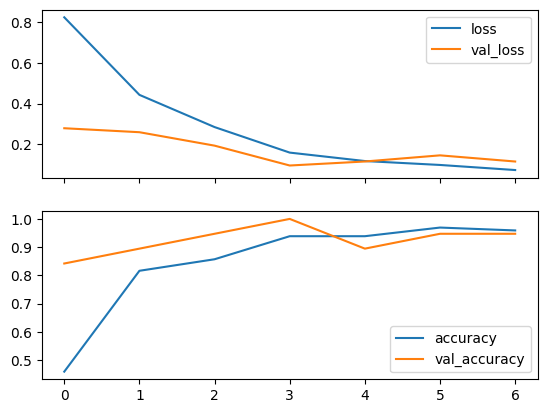

In [ ]:
plot_epochs_accuracy(history_iris)

In [ ]:
y_pred_iris= model_iris.predict(X_test_scaled)
y_pred_iris1 = np.argmax(y_pred_iris, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [ ]:
y_pred_iris=to_categorical(y_pred_iris1, num_classes=3)

In [ ]:
print(model_iris.evaluate(X_test_scaled, y_test_iris_enc)[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0713
1.0


In [ ]:
print(classification_report(y_test_iris_enc, y_pred_iris))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



<Axes: >

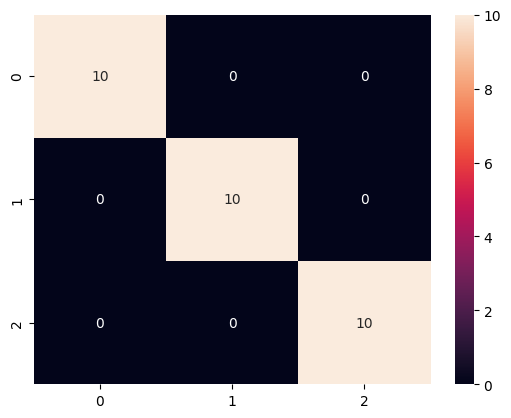

In [ ]:
sns.heatmap(confusion_matrix(y_test_iris, y_pred_iris1), annot=True)

**Grid search for best parameters**

In [ ]:
def create_model_iris(activation='relu', layers=1):
    model = Sequential()
    model.add(Dense(32, input_dim=4, activation=activation))

    for _ in range(layers):
        model.add(Dense(32, activation=activation))

    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer=Adam(learning_rate=0.1), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_iris_kr = KerasClassifier(model=create_model_iris, optimizer=Adam(learning_rate=0.1), epochs=10, batch_size=32)

activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
param_grid = {
    'model__activation': activation,
    'model__layers': np.arange(1, 5, 1)
}

grid = GridSearchCV(estimator=model_iris_kr, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3)

grid_result = grid.fit(X_train_scaled, y_train_iris_enc)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3906 - loss: 1.5111
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7645 - loss: 0.5373 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9552 - loss: 0.2552 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9346 - loss: 0.1531 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9424 - loss: 0.1516 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9655 - loss: 0.1026 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9459 - loss: 0.1644 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9532 - loss: 0.3012 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9328 - loss: 0.2336 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9146 - loss: 0.7358 


In [ ]:
grid_result.best_params_

{'model__activation': 'relu', 'model__layers': 3}

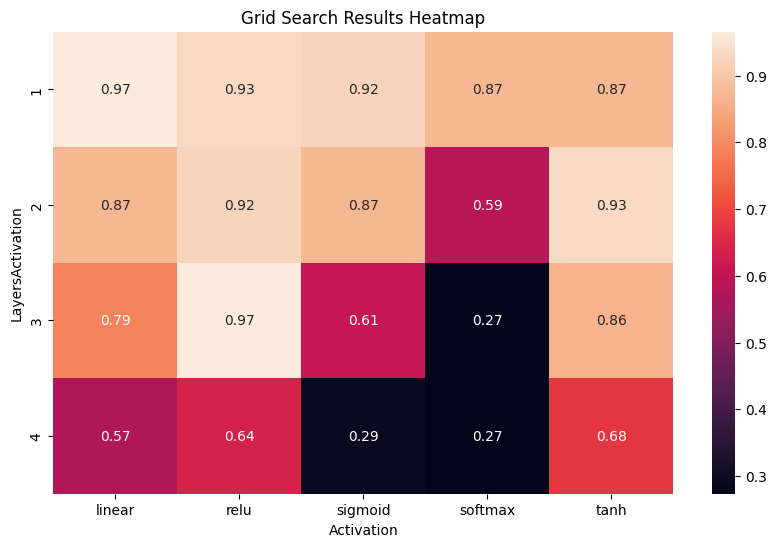

In [ ]:
results_iris = grid_result.cv_results_

data = pd.DataFrame({
    'layers': results_iris['param_model__layers'],
    'activation': results_iris['param_model__activation'],
    'mean_score': results_iris['mean_test_score']
})

heatmap_data = data.pivot(index='layers', columns='activation', values='mean_score')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True)
plt.xlabel('Activation')
plt.ylabel('LayersActivation')
plt.title('Grid Search Results Heatmap')
plt.show()

In [ ]:
best_keras_classifier = grid_result.best_estimator_
test_accuracy = best_keras_classifier.score(X_test_scaled, y_test_iris_enc)
print(test_accuracy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1.0


In [ ]:
y_pred_best= best_keras_classifier.predict(X_test_scaled)
y_pred_best1 = np.argmax(y_pred_best, axis=1)
y_pred_best=to_categorical(y_pred_best1, num_classes=3)
print(classification_report(y_test_iris_enc, y_pred_best))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30



<Axes: >

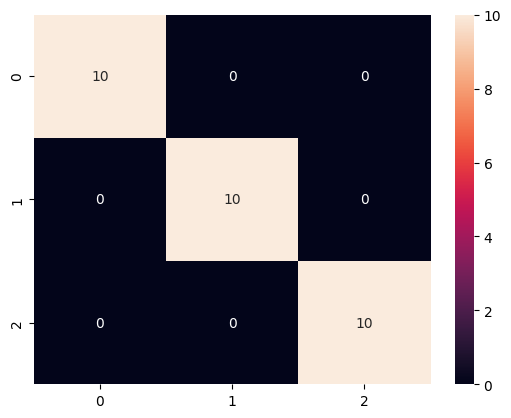

In [ ]:
sns.heatmap(confusion_matrix(y_test_iris, y_pred_best1), annot=True)